### Shrikant Kale - 301150258

### Lab Assignment 2 - Autoencoders and Transfer Learning

a.1. Import and load the 'fashion_mnist' dataset from TensorFlow. Using 2 dictionaries store the fashion_mnist datasets into unsupervised_firstname and supervised_firstname, where firstname is your firstname. The first 60,000 data samples will be stored in unsupervised_firstname directory with one key 'images', which will contain the images for unsupervised learning. The next 10,000 data samples will be stored in supervised_firstname directory with keys 'images' and 'labels', which will contain the images and labels for supervised learning

In [137]:
#importing libraries
import tensorflow as tf
import numpy as np

#getting the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

#loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#creating dictionaries to store dataset
unsupervised_shrikant = {}
supervised_shrikant = {}

#storing training images in dictionary unsupervised_shrikant
unsupervised_shrikant['images'] = train_images

#storing testing images and labels in dictionary supervised_shrikant
supervised_shrikant['images'] = test_images
supervised_shrikant['labels'] = test_labels


b. Data Pre-preprocessing
1. Normalize the pixal values in the dataset to a range between 0-1. Store result back into unsupervised_firstname['images'] and supervised_firstname['images']
2. Using tenflow's build in method to_cateogircal() to one-hot encode the labels. Store results back into supervised_firstname['labels'].
3. Display (print) the shape of the unsupervised_firstname['images'], supervised_firstname['images'] and supervised_firstname['labels'].


In [138]:
from keras.utils import to_categorical

#normalize the supervised and unsupervised data to range between 0 and 1
unsupervised_shrikant['images'] = unsupervised_shrikant['images'] / 255
supervised_shrikant['images'] = supervised_shrikant['images'] / 255

#one hot encode the labels
supervised_shrikant['labels'] = to_categorical(supervised_shrikant['labels'])

#Display shapes
print("Shape of unsupervised image dataset", unsupervised_shrikant['images'].shape)
print("Shape of supervised image dataset", supervised_shrikant['images'].shape)
print("Shape of supervised labels dataset", supervised_shrikant['labels'].shape)

Shape of unsupervised image dataset (60000, 28, 28)
Shape of supervised image dataset (10000, 28, 28)
Shape of supervised labels dataset (10000, 10)


c. Data Preparation (Training, Validation, Testing)
1. Using Sklearn's train_test_split() method split the unsupervised dataset into training (57,000 samples) and validation (3,000 samples). Set the random seed to be the last two digits of your student ID number. Store the training and validation data in a dataframe named: unsupervised_train_firstname and unsupervised_val_firstname for the feature (predictors) of the training and validation data respectively.

In [139]:
from sklearn.model_selection import train_test_split

unsupervised_train_shrikant, unsupervised_val_shrikant = train_test_split(unsupervised_shrikant['images'], test_size=0.05, random_state=58)

2. Using Sklearn's train_test_split() method randomly discard 7,000 samples from the supervised dataset. Set the random seed to be the last two digits of your student ID number.
3. Using Sklearn's train_test_split() method split the remaining supervised dataset (3,000 samples) into training (1800), validation(600) and testing(600). Set the random seed to be the last two digits of your student ID number. Store the datasets in a dataframe named: x_train_firstname, x_val_firstname, and x_test_firstname for the feature (predictors) and the training labels y_train_firstname, y_val_firstname, and y_test_firstname.

In [140]:
#discard 7000 samples from supervised dataset randomly
X_supervised_discarded, X_supervised, y_supervised_discarded,  y_supervised = train_test_split(supervised_shrikant['images'], supervised_shrikant['labels'], test_size=0.3, shuffle=True, random_state=58 )

#splitting remaining supervised dataset into training and test_val sets
X_train_shrikant, X_test_val, y_train_shrikant, y_test_val = train_test_split(X_supervised, y_supervised, test_size=0.4, random_state=58)

#splitting test_val set into testing and validation set
X_val_shrikant, X_test_shrikant, y_val_shrikant, y_test_shrikant = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=58)


4. Display (print) the shape of the unsupervised_train_firstname, unsupervised_val_firstname, x_train_firstname, x_val_firstname, x_test_firstname, y_train_firstname, y_val_firstname, and y_test_firstname.

In [141]:
print("Shape of Unsupervised Training set: ", unsupervised_train_shrikant.shape)
print("Shape of Unsupervised Validation set: ", unsupervised_val_shrikant.shape)

print("Shape of Supervised Training Feature set: ", X_train_shrikant.shape)
print("Shape of Supervised Validation Feature set: ", X_val_shrikant.shape)
print("Shape of Supervised Testing Feature set: ", X_test_shrikant.shape)

print("Shape of Supervised Training Label set: ", y_train_shrikant.shape)
print("Shape of Supervised Validation Label set: ", y_val_shrikant.shape)
print("Shape of Supervised Testing Label set: ", y_test_shrikant.shape)

Shape of Unsupervised Training set:  (57000, 28, 28)
Shape of Unsupervised Validation set:  (3000, 28, 28)
Shape of Supervised Training Feature set:  (1800, 28, 28)
Shape of Supervised Validation Feature set:  (600, 28, 28)
Shape of Supervised Testing Feature set:  (600, 28, 28)
Shape of Supervised Training Label set:  (1800, 10)
Shape of Supervised Validation Label set:  (600, 10)
Shape of Supervised Testing Label set:  (600, 10)


d. Build, Train, and Validate a baseline CNN Model
1. Use TensorFlow's Sequential() to build a CNN mode (name the model cnn_v1_model_firstname) with the following architecture:
i. Input = Set based on image size of the fashion MNIST dataset.
ii. 1st Layer = Convolution with 16 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2.
iii. 3rd Layer = Convolution with 8 filter kernels with window size 3x3, , a 'relu' activation function, 'same' padding, and a stride of 2.
iv. 4th Layer = Full connected layer with 100 neurons (Note: Input to fully connected layer should be flatten first)
v. Output = Set output size using info identified in Step b.3 and a softmax activation function
2. Compile the model with 'adam' optimizer, 'cateogrical_crossentropy' loss function, 'accuracy' metric

In [142]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

cnn_v1_model_shrikant = Sequential()
cnn_v1_model_shrikant.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2, input_shape=(28, 28, 1)))
cnn_v1_model_shrikant.add(MaxPooling2D(2,2))
cnn_v1_model_shrikant.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
cnn_v1_model_shrikant.add(Flatten())
cnn_v1_model_shrikant.add(Dense(100))
cnn_v1_model_shrikant.add(Dense(10, activation='softmax'))

# compile model
cnn_v1_model_shrikant.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



3. Display (print) a summary of the model using summary(). Draw a diagram illustrating the structure of the neural network model, making note of the size of each layer (# of neurons) and number of weights in each layer.

In [143]:
#summary of the model
cnn_v1_model_shrikant.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 4, 4, 8)           1160      
                                                                 
 flatten_9 (Flatten)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               12900     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                      

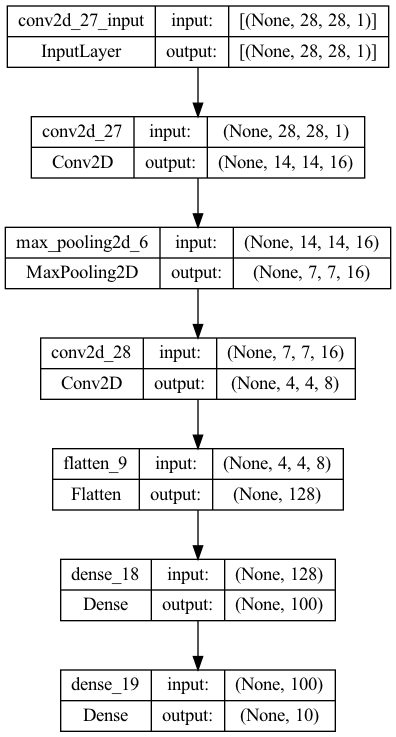

In [144]:
#diagram illustraing structure of the model
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(cnn_v1_model_shrikant, to_file='model.png', show_shapes=True, show_layer_names=True)

4. Using TensorFlow's fit() and the training/validation supervised dataset to train and validate the cnn model with 10 epochs and batch size of 256. Store training/validation results in cnn_v1_history_firstname.

In [145]:
cnn_v1_history_shrikant = cnn_v1_model_shrikant.fit(X_train_shrikant, y_train_shrikant, epochs=10, batch_size=256, validation_data=(X_val_shrikant, y_val_shrikant), verbose=0)

2022-10-23 12:01:57.880512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-23 12:01:58.338865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


e. Test and analyze the baseline model
1. Display (plot) the Training Vs Validation Accuracy of the baseline CNN Model as a line graph using matplotlib. Provide proper axis labels, title and a legend. Use different line color's for training and validation accuracy. Compare and analyze the training and validation accuracy in your report.

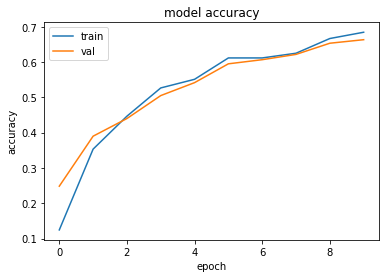

In [146]:
from matplotlib import pyplot

pyplot.plot(cnn_v1_history_shrikant.history['accuracy'])
pyplot.plot(cnn_v1_history_shrikant.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

2. Evaluate the cnn model with the test dataset using Tensorflow's evaluate() and display (Print) the test accuracy. Compare and discuss the test accuracy to the validation accuracy in your report

In [147]:
score_test = cnn_v1_model_shrikant.evaluate(X_test_shrikant, y_test_shrikant)
print("Test Data Accuracy", score_test[1])

score_val = cnn_v1_model_shrikant.evaluate(X_val_shrikant, y_val_shrikant)
print("Validation Data Accuracy", score_val[1])

19/19 [==============================] - 1s 17ms/step - loss: 0.8838 - accuracy: 0.7033
Test Data Accuracy 0.7033333778381348
19/19 [==============================] - 0s 8ms/step - loss: 0.8725 - accuracy: 0.6633
Validation Data Accuracy 0.6633333563804626


3. Create predictions on the test dataset using TensorFlow's predict(). Name in the predictions cnn_predictions_firstname.

In [148]:
cnn_predictions_shrikant = cnn_v1_model_shrikant.predict(X_test_shrikant)

19/19 [==============================] - 0s 2ms/step


2022-10-23 12:02:01.372798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4. Display (plot) the confusion matrix of the test prediction using matplotlib, seaborn, and sklearn's confusion matrix.

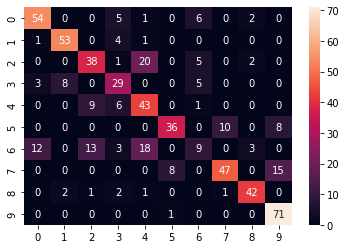

In [149]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cnn_predictions_shrikant = cnn_predictions_shrikant.argmax(axis=1)
y_test_shrikant_conf = [np.argmax(y, axis=None, out=None) for y in y_test_shrikant]

cm = confusion_matrix(y_test_shrikant_conf, cnn_predictions_shrikant)
f = sns.heatmap(cm, annot=True, fmt='d')

f. Add random noise to unsupervised dataset
1. Using tf.random.normal(), add random noise to the training and validation unsupervised dataset with a noise factor of 0.2. Set the random seed to be the last two digits of your student ID number. Store results into x_train_noisy_firstname and x_val_noisy_firstname. For more info, reference: https://www.tensorflow.org/api_docs/python/tf/random/normal
2. Using tf.clip_by_value(), clip the values of the noisy dataset to a range between 0 and 1. Store results back into x_train_noisy_firstname and x_val_noisy_firstname. For more info, reference: https://www.tensorflow.org/api_docs/python/tf/clip_by_value

In [150]:
noise_factor = 0.2

#random noise for unsupervised training data
noise_train=tf.random.normal(unsupervised_train_shrikant.shape, 0, 1, tf.float32, seed=58)
noise_train = tf.clip_by_value(noise_train, clip_value_min=0, clip_value_max=1)

#random noise for unsupervised testing data
noise_val=tf.random.normal(unsupervised_val_shrikant.shape, 0, 1, tf.float32, seed=58)
noise_val = tf.clip_by_value(noise_val, clip_value_min=0, clip_value_max=1)

#adding random noise to unsupervised training and validation data
X_train_noisy_shrikant  = unsupervised_train_shrikant + noise_factor * noise_train
X_val_noisy_shrikant = unsupervised_val_shrikant + noise_factor * noise_val


3. Display (plot) the first 10 images from the x_val_noisy_firstname using matplotlib. Remove xticks and yticks when plotting the image.

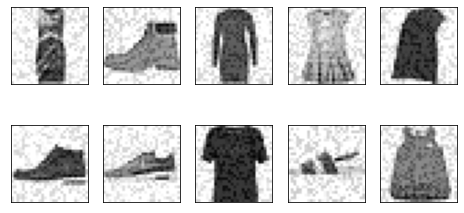

In [151]:
pyplot.figure(figsize=(8, 4))
for i in range(0,10):
    pyplot.subplot(2, 5, i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(X_val_noisy_shrikant[i], cmap=pyplot.cm.binary)
pyplot.show()
    

g. Build and pretrain Autoencoder
1. Use TensorFlow's Model() [For more info, reference: https://www.tensorflow.org/api_docs/python/tf/keras/Model] to build an autoencoder mode (name the autoencoder_firstname) with the following architecture:
i. Input = Set based on image size of the fashion MNIST dataset. Store layer as inputs_firstname.
ii. Encoder Section (Store layers as e_firstname)
1. Convolution with 16 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2.
2. Convolution with 8 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2.
iii. Decoder Section (Store layers as d_firstname)
1. Transposed Convolution with 8 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2. For more info reference: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose
2. Transposed Convolution with 16 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2.
3. Convolution with 1 filter kernels with window size 3x3, a 'sigmoid' activation function, and 'same' padding.

In [152]:
inputs_shrikant = tf.keras.Input(shape=(28,28,1))
e_shrikant =  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2) (inputs_shrikant)
e_shrikant = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2) (e_shrikant)
d_shrikant = tf.keras.layers.Conv2DTranspose(8, (3,3), activation='relu', padding='same', strides=2) (e_shrikant)
d_shrikant = tf.keras.layers.Conv2DTranspose(16, (3,3), activation='relu', padding='same', strides=2) (d_shrikant)
d_shrikant = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same') (d_shrikant)

autoencoder_shrikant = tf.keras.Model(inputs_shrikant, d_shrikant)

2. Compile the model with 'adam' optimizer, and 'mean squared error' loss function.

In [153]:
# compile model
autoencoder_shrikant.compile(optimizer='adam', loss='mean_squared_error')

3. Display (print) a summary of the model using summary(). Draw a diagram illustrating the structure of the neural network model, making note of the size of each layer (# of neurons) and number of weights in each layer.

In [154]:
autoencoder_shrikant.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 14, 14, 8)        584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 28, 28, 16)       1168      
 Transpose)                                                      
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 1)         145 

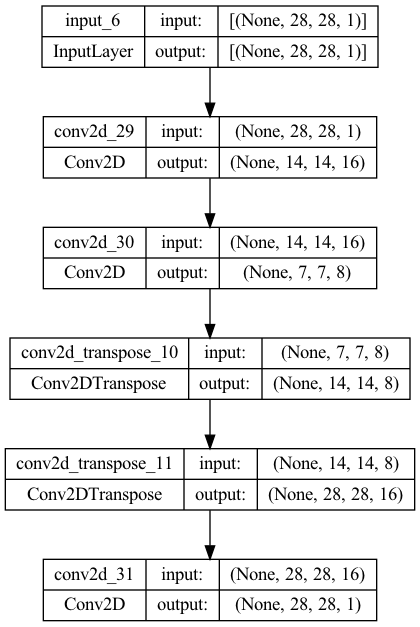

In [155]:
tf.keras.utils.plot_model(autoencoder_shrikant, show_shapes=True, show_layer_names=True)

4. Using TensorFlow's fit() and the training/validation unsupervised dataset to train and validate the cnn model with 10 epochs, batch size of 256 and shuffle set to True. Use the noisy images from step f as input and original images from step c.1 as output.

In [156]:
autoencoder_shrikant.fit(X_train_noisy_shrikant, unsupervised_train_shrikant, epochs=10, batch_size=256, shuffle=True, validation_data=(X_val_noisy_shrikant,unsupervised_val_shrikant), verbose=0)

2022-10-23 12:02:06.253392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-23 12:02:09.896156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5. Create predictions on the unsupervised_val_firstname dataset using TensorFlow's predict(). Name in the predictions autoencoder_predictions_firstname.

In [157]:
autoencoder_predictions_shrikant = autoencoder_shrikant.predict(unsupervised_val_shrikant)

 9/94 [=>............................] - ETA: 0s 

2022-10-23 12:02:39.899216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 4ms/step


6. Display (plot) the first 10 predicted images from step 5 the using matplotlib. Remove xticks and yticks when plotting the image.

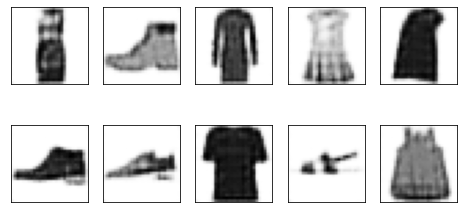

In [158]:
pyplot.figure(figsize=(8, 4))
for i in range(0,10):
    pyplot.subplot(2, 5, i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(autoencoder_predictions_shrikant[i], cmap=pyplot.cm.binary)
pyplot.show()

h. Build and perform transfer learning on a CNN with the Autoencoder
1. Use TensorFlow's Model() [For more info, reference: https://www.tensorflow.org/api_docs/python/tf/keras/Model] to build a cnn mode (name the cnn_v2_firstname) with the following architecture:
i. Input = Transferred from Autoencoder. See step g.1.i
ii. 1st layer = Transferred from encoder section of Autoencoder (step g.1.ii
iii. 2nd layer = Full connected layer with 100 neurons (Note: Input to fully connected layer should be flatten first)
iv. Output = Set output size using info identified in Step b.3 and a softmax activation function
2. Compile the model with 'adam' optimizer, 'cateogrical_crossentropy' loss function, 'accuracy' metric

In [159]:
inputs = inputs_shrikant
layer_encoder =  autoencoder_shrikant.layers[2]
encoder_output = layer_encoder.output
flatten_layer = tf.keras.layers.Flatten() (encoder_output)
dense_layer = tf.keras.layers.Dense(100) (flatten_layer)
output_layer = tf.keras.layers.Dense(10, activation='softmax') (dense_layer)

cnn_v2_model_shrikant = tf.keras.Model(inputs, output_layer)

cnn_v2_model_shrikant.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


3. Display (print) a summary of the model using summary(). Draw a diagram illustrating the structure of the neural network model, making note of the size of each layer (# of neurons) and number of weights in each layer.

In [160]:
#summary of the model
cnn_v2_model_shrikant.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 flatten_10 (Flatten)        (None, 392)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               39300     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 41,630
Trainable params: 41,630
Non-trainable

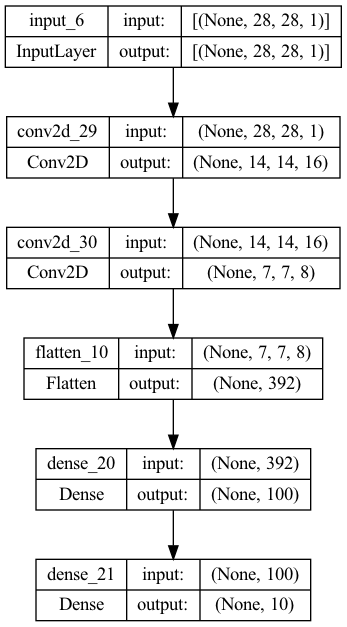

In [161]:
tf.keras.utils.plot_model(cnn_v2_model_shrikant, show_shapes=True, show_layer_names=True)

4. Using TensorFlow's fit() and the training/validation supervised dataset to train and validate the cnn model with 10 epochs and batch size of 256. Store training/validation results in cnn_v2_history_firstname

In [162]:
cnn_v2_history_shrikant = cnn_v2_model_shrikant.fit(X_train_shrikant, y_train_shrikant, epochs=10, batch_size=256, validation_data=(X_val_shrikant, y_val_shrikant), verbose=0)

2022-10-23 12:02:41.594549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-23 12:02:42.084588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


i. Test and analyze the pretrained CNN model
1. Display (plot) the Training Vs Validation Accuracy of the pretrained CNN Model as a line graph using matplotlib. Provide proper axis labels, title and a legend. Use different line color's for training and validation accuracy. Compare and analyze the training and validation accuracy in your report

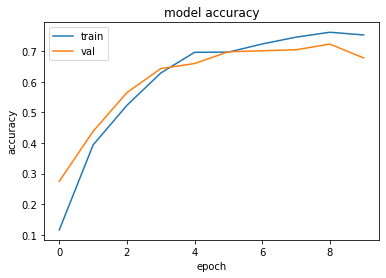

In [163]:
pyplot.plot(cnn_v2_history_shrikant.history['accuracy'])
pyplot.plot(cnn_v2_history_shrikant.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

2. Evaluate the cnn model with the test dataset using Tensorflow's evaluate() and display (Print) the test accuracy. Compare and discuss the test accuracy to the validation accuracy in your report

In [164]:
score_test = cnn_v2_model_shrikant.evaluate(X_test_shrikant, y_test_shrikant)
print("Test Data Accuracy", score_test[1])

score_val = cnn_v2_model_shrikant.evaluate(X_val_shrikant, y_val_shrikant)
print("Validation Data Accuracy", score_val[1])

19/19 [==============================] - 1s 16ms/step - loss: 0.8278 - accuracy: 0.6900
Test Data Accuracy 0.6899999976158142
19/19 [==============================] - 0s 7ms/step - loss: 0.8371 - accuracy: 0.6783
Validation Data Accuracy 0.6783333420753479


3. Create predictions on the test dataset using TensorFlow's predict(). Name in the predictions cnn_predictions_firstname.

In [165]:
cnn_predictions_shrikant = cnn_v2_model_shrikant.predict(X_test_shrikant)

19/19 [==============================] - 0s 3ms/step


2022-10-23 12:02:45.185354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4. Display (plot) the confusion matrix of the test prediction using matplotlib, seaborn, and sklearn's confusion matrix.

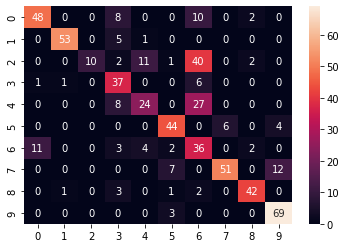

In [166]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cnn_predictions_shrikant = cnn_predictions_shrikant.argmax(axis=1)
y_test_shrikant_conf = [np.argmax(y, axis= None, out= None) for y in y_test_shrikant]

cm = confusion_matrix(y_test_shrikant_conf, cnn_predictions_shrikant)
f = sns.heatmap(cm, annot=True, fmt='d')

j. Compare the performance of the baseline CNN model to the pretrained model in your report
1. Display (plot) the Validation Accuracy of the Baseline vs the Pretrained model as a line graph using matplotlib. Provide proper axis labels, title and a legend. Use different line color's for the baseline and pretrained accuracy. Compare and analyze the validation accuracy in your report.
2. Compare and analyze the test accuracy in your report.

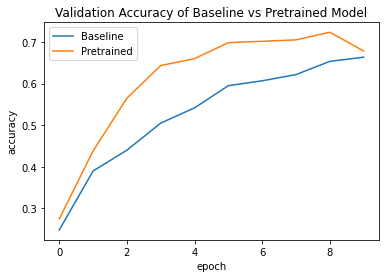

In [167]:
pyplot.plot(cnn_v1_history_shrikant.history['val_accuracy'])
pyplot.plot(cnn_v2_history_shrikant.history['val_accuracy'])
pyplot.title('Validation Accuracy of Baseline vs Pretrained Model')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['Baseline', 'Pretrained'], loc='upper left')
pyplot.show()

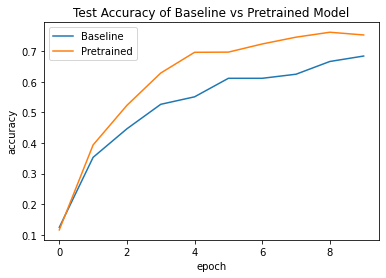

In [168]:
pyplot.plot(cnn_v1_history_shrikant.history['accuracy'])
pyplot.plot(cnn_v2_history_shrikant.history['accuracy'])
pyplot.title('Test Accuracy of Baseline vs Pretrained Model')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['Baseline', 'Pretrained'], loc='upper left')
pyplot.show()